In [1]:
import glob,sys,os,re
import numpy as np
import pandas as pd
from mylab.Functions import *
from core.context_exposure import *
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# context_map

In [2]:
context_map = pd.read_csv(r"context_map.csv")

In [3]:
context_map

,Unnamed: 0,mouse_id,part,aim,index,ctx_0,ctx_1,ctx_2,rule_0,rule_1,rule_2
0,249,206553,1,ce,20200721-142122,A,B,C,left,left,left
1,176,206551,1,ce,20200721-150926,A,B,C,left,left,left
2,116,206548,1,ce,20200721-155255,A,B,C,left,left,left
3,210,206552,1,ce,20200721-162523,A,B,C,left,left,left
4,146,206550,1,ce,20200721-170601,A,B,C,left,left,left
...,...,...,...,...,...,...,...,...,...,...,...
285,40,201033,6,test,20200908-192132,B,A,C,left,right,None
286,42,201033,6,test,20200909-144959,B,A,C,left,right,None
287,41,201033,6,all_blank,20200909-150837,B,A,C,left,right,None
288,289,206553,6,test,20200909-155313,B,A,C,left,right,None


## index celltypes

In [4]:
celltypes = index_celltypes(part=234)
celltypes = [i for i in celltypes if "aim_ce"  in i and "080" in i and not "20103" in i and "0801" not in i]
# celltypes_2020061 = [i for i in celltypes if "20200805" in i or "20200806" in i or "20200807" in i];
celltypes

['\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_2020061_part234_day20200805_aim_ce.pkl',
 '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_2020061_part234_day20200806_aim_ce.pkl',
 '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_2020061_part234_day20200807_aim_ce.pkl',
 '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_206534_part234_day20200805_aim_ce.pkl',
 '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_206534_part234_day20200806_aim_ce.pkl',
 '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_206534_part234_day20200807_aim_ce.pkl',
 '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_206548_part234_day20200806_aim_ce.pkl',
 '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_206548_part234_day20200807_aim_ce.pkl',
 '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_206548_part234_day20200808_ai

In [5]:
mouseids = ["2020061","206534","206548","206550","206551","206552","206553"]

Celltypes = {}
for mouseid in mouseids:
    Celltypes[mouseid] = [i for i in celltypes if mouseid in i]

In [6]:
Celltypes["2020061"]

['\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_2020061_part234_day20200805_aim_ce.pkl',
 '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_2020061_part234_day20200806_aim_ce.pkl',
 '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_2020061_part234_day20200807_aim_ce.pkl']

## wenn fig for single day

### calculate the proportion and mean

rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s


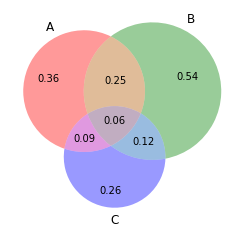

rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s


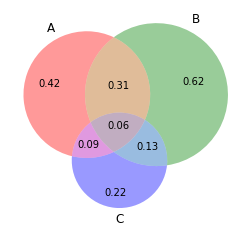

rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s


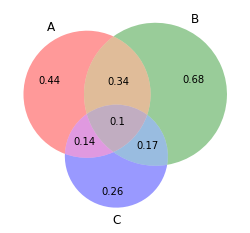

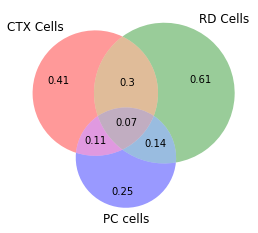

In [50]:
wenn_lists_aves=[]
for i in range(3):
    contextcell_ids=[]
    rdcell_ids=[]
    pccell_ids=[]
    celltype_files = [f[i] for f in Celltypes.values()]
    wenn_lists=[]
    for celltype_file in celltype_files:
        contextcell_id, rdcell_id,pccell_id,total_cell_num = specific_ids(celltype_file,contexts=[0,1])
        
        contextcell_ids= list(set(contextcell_id["ctx0cells"]+contextcell_id["ctx1cells"]))
        rdcell_ids = list(set(rdcell_id["context0_leftcells"]+ rdcell_id["context0_rightcells"]+ rdcell_id["context1_leftcells"]+ rdcell_id["context1_rightcells"]))
        pccell_ids = list(set(pccell_id["context0_pccells"] + pccell_id["context1_pccells"]))
#         print(rdcell_ids)
        
        ctx_cellids = list(set(spread(contextcell_id.values())))
        rd_cellids = list(set(spread(rdcell_id.values())))
        ctx_rd_cellids = [i for i in ctx_cellids if i in rd_cellids]

        pc_cellids = list(set(spread(pccell_id.values())))        
        ctx_pc_cellids = [i for i in ctx_cellids if i in pc_cellids]
        rd_pc_cellids = [i for i in rd_cellids if i in pc_cellids]

        ctx_rd_pc_cellids = [i for i in ctx_rd_cellids if i in pc_cellids]
        
        wenn_list = [len(ctx_cellids)/total_cell_num
                     ,len(rd_cellids)/total_cell_num
                     ,len(ctx_rd_cellids)/total_cell_num
                     ,len(pc_cellids)/total_cell_num
                     ,len(ctx_pc_cellids)/total_cell_num
                     ,len(rd_pc_cellids)/total_cell_num
                     ,len(ctx_rd_pc_cellids)/total_cell_num]
        
        wenn_lists.append(wenn_list)
    wenn_lists_ave = np.mean(wenn_lists,axis=0)
    wenn_lists_aves.append(wenn_lists_ave)
    wenn_lists_round2 = [round(i,2) for i in wenn_lists_ave]
    venn3(wenn_lists_round2)
    plt.show()
wenn_lists_aves_round2 = [round(i,2) for i in np.mean(wenn_lists_aves,axis=0)]
venn3(wenn_lists_aves_round2,set_labels=("CTX Cells","RD Cells","PC cells"))

### pool all the cells and calculate the proportion

rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
1


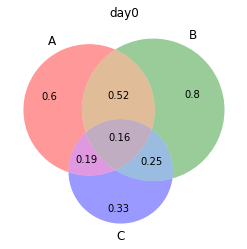

rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
2


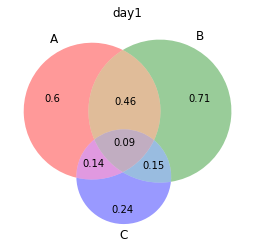

rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
3


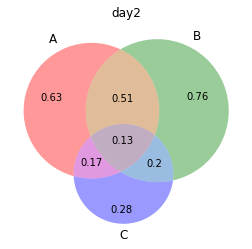

[[0.5957257346393589, 0.8040961709706145, 0.5191451469278717, 0.3330365093499555, 0.19056099732858414, 0.25289403383793413, 0.1620658949243099], [0.6028495102404274, 0.7070347284060552, 0.4577025823686554, 0.24487978628673196, 0.13535173642030277, 0.14692787177203917, 0.0881567230632235], [0.6313446126447017, 0.755120213713268, 0.5138023152270703, 0.27871772039180764, 0.17275155832591274, 0.19768477292965272, 0.13446126447016918]]


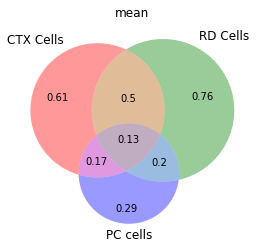

In [30]:
wenn_lists_days=[]
for i in range(3):
    contextcell_ids=[]
    rdcell_ids=[]
    pccell_ids=[]
    celltype_files = [f[i] for f in Celltypes.values()]

    for celltype_file in celltype_files:
        contextcell_id, rdcell_id,pccell_id,total_cell_num = specific_ids(celltype_file,contexts=[0,1])
        
        contextcell_ids=contextcell_ids+contextcell_id["ctx0cells"]+contextcell_id["ctx1cells"]
        rdcell_ids = rdcell_ids + rdcell_id["context0_leftcells"]+ rdcell_id["context0_rightcells"]+ rdcell_id["context1_leftcells"]+ rdcell_id["context1_rightcells"]
        pccell_ids = pccell_ids + pccell_id["context0_pccells"] + pccell_id["context1_pccells"]
    
    ctx_cellids = list(set(spread(contextcell_id.values())))
    rd_cellids = list(set(spread(rdcell_id.values())))
    ctx_rd_cellids = [i for i in ctx_cellids if i in rd_cellids]

    pc_cellids = list(set(spread(pccell_id.values())))        
    ctx_pc_cellids = [i for i in ctx_cellids if i in pc_cellids]
    rd_pc_cellids = [i for i in rd_cellids if i in pc_cellids]

    ctx_rd_pc_cellids = [i for i in ctx_rd_cellids if i in pc_cellids]

    wenn_lists = [len(ctx_cellids)/total_cell_num
                 ,len(rd_cellids)/total_cell_num
                 ,len(ctx_rd_cellids)/total_cell_num
                 ,len(pc_cellids)/total_cell_num
                 ,len(ctx_pc_cellids)/total_cell_num
                 ,len(rd_pc_cellids)/total_cell_num
                 ,len(ctx_rd_pc_cellids)/total_cell_num]
    wenn_lists_days.append(wenn_lists)
    print(len(wenn_lists_days))
    wenn_lists_round2 = [round(i,2) for i in wenn_lists]
    venn3(wenn_lists_round2)
#     venn3(subsets= [set(contextcell_ids),set(rdcell_ids),set(pccell_ids)],set_labels=("CTX Cells","RD Cells","PC cells"))
    plt.title("day%s"%i)
    plt.show()
    
print(wenn_lists_days)
wenn_lists_days_mean = np.mean(wenn_lists_days,axis=0)
wenn_lists_days_mean_round2=[round(i,2) for i in wenn_lists_days_mean]
venn3(wenn_lists_days_mean_round2,set_labels=("CTX Cells","RD Cells","PC cells"))
plt.title("mean")
plt.show()

In [17]:
round(0.23234324,2)

0.23

### count the number

rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s


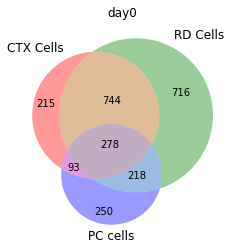

rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s


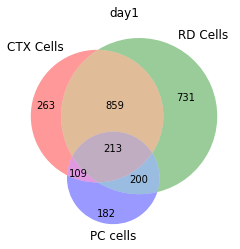

rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s


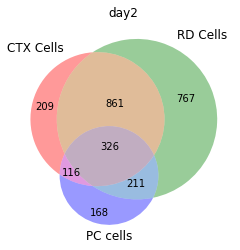

In [14]:


for i in range(3):
    contextcell_ids=[]
    rdcell_ids=[]
    pccell_ids=[]
    celltype_files = [f[i] for f in Celltypes.values()]
    for celltype_file in celltype_files:
        contextcell_id, rdcell_id,pccell_id,total_cell_num = specific_ids(celltype_file,contexts=[0,1])
        
        contextcell_ids=contextcell_ids+contextcell_id["ctx0cells"]+contextcell_id["ctx1cells"]
        rdcell_ids = rdcell_ids + rdcell_id["context0_leftcells"]+ rdcell_id["context0_rightcells"]+ rdcell_id["context1_leftcells"]+ rdcell_id["context1_rightcells"]
        pccell_ids = pccell_ids + pccell_id["context0_pccells"] + pccell_id["context1_pccells"]
    
    
    venn3(subsets= [set(contextcell_ids),set(rdcell_ids),set(pccell_ids)],set_labels=("CTX Cells","RD Cells","PC cells"))
    plt.title("day%s"%i)
    plt.show()

## for all mice in 4 days

### construct nums

In [15]:

nums = []
for i in range(3):
    contextcell_ids=[]
    rdcell_ids=[]
    pccell_ids=[]
    celltype_files = [f[i] for f in Celltypes.values()]
    num_per_day=[]
    for celltype_file in celltype_files:
        print(re.findall("(\d+)_part",celltype_file)[0])
        num_per_mouse = []
        contextcell_id, rdcell_id,pccell_id,total_cell_num = specific_ids(celltype_file,contexts=[0,1])
        
        ctx_cellids = list(set(spread(contextcell_id.values())))
        rd_cellids = list(set(spread(rdcell_id.values())))
        pc_cellids = list(set(spread(pccell_id.values())))
        ctx_rd_cellids = [i for i in ctx_cellids if i in rd_cellids]
        ctx_pc_cellids = [i for i in ctx_cellids if i in pc_cellids]
        rd_pc_cellids = [i for i in rd_cellids if i in pc_cellids]
        ctx_rd_pc_cellids = [i for i in ctx_rd_cellids if i in pc_cellids]
        num_per_mouse = [len(ctx_cellids),len(rd_cellids),len(pc_cellids)
                         ,len(ctx_rd_cellids),len(ctx_pc_cellids),len(rd_pc_cellids),len(ctx_rd_pc_cellids),
        total_cell_num]
        num_per_day.append(num_per_mouse)
                             
    nums.append(num_per_day)
nums = np.array(nums) # (day,mouse,type)
nums

2020061
rdcells: try body_speed> 3cm/s
206534
rdcells: try body_speed> 3cm/s
206548
rdcells: try body_speed> 3cm/s
206550
rdcells: try body_speed> 3cm/s
206551
rdcells: try body_speed> 3cm/s
206552
rdcells: try body_speed> 3cm/s
206553
rdcells: try body_speed> 3cm/s
2020061
rdcells: try body_speed> 3cm/s
206534
rdcells: try body_speed> 3cm/s
206548
rdcells: try body_speed> 3cm/s
206550
rdcells: try body_speed> 3cm/s
206551
rdcells: try body_speed> 3cm/s
206552
rdcells: try body_speed> 3cm/s
206553
rdcells: try body_speed> 3cm/s
2020061
rdcells: try body_speed> 3cm/s
206534
rdcells: try body_speed> 3cm/s
206548
rdcells: try body_speed> 3cm/s
206550
rdcells: try body_speed> 3cm/s
206551
rdcells: try body_speed> 3cm/s
206552
rdcells: try body_speed> 3cm/s
206553
rdcells: try body_speed> 3cm/s


array([[[ 176,  181,   64,  107,   37,   29,   17,  333],
        [  24,   23,   63,    4,    8,    7,    2,  185],
        [ 129,  230,   98,   95,   41,   64,   31,  345],
        [ 101,  226,   99,   68,   23,   49,   16,  379],
        [  47,  123,   65,   24,   13,   19,    7,  320],
        [ 184,  270,   76,  141,   35,   44,   23,  402],
        [ 669,  903,  374,  583,  214,  284,  182, 1123]],

       [[ 170,  231,   69,  128,   27,   36,   14,  333],
        [  86,  111,   31,   65,   18,   17,   12,  185],
        [ 163,  201,  109,  112,   46,   59,   29,  345],
        [ 124,  269,  104,   99,   39,   77,   31,  379],
        [  50,  118,   40,   20,    6,   13,    4,  320],
        [ 174,  279,   76,  134,   34,   46,   24,  402],
        [ 677,  794,  275,  514,  152,  165,   99, 1123]],

       [[ 170,  259,   80,  143,   45,   60,   37,  333],
        [  86,  118,   59,   56,   39,   34,   22,  185],
        [ 160,  220,  107,  116,   54,   63,   36,  345],
        [ 

### total cell numbers

In [31]:
np.sum(nums[:,:,7][0])

3087

In [34]:
np.shape(nums)

(3, 7, 8)

### plot

[[0.52852853 0.12972973 0.37391304 0.26649077 0.146875   0.45771144
  0.59572573]
 [0.51051051 0.46486486 0.47246377 0.32717678 0.15625    0.43283582
  0.60284951]
 [0.51051051 0.46486486 0.46376812 0.33773087 0.196875   0.48756219
  0.63134461]]
[[0.54354354 0.12432432 0.66666667 0.59630607 0.384375   0.67164179
  0.80409617]
 [0.69369369 0.6        0.5826087  0.70976253 0.36875    0.69402985
  0.70703473]
 [0.77777778 0.63783784 0.63768116 0.66754617 0.58125    0.69900498
  0.75512021]]
[[0.19219219 0.34054054 0.28405797 0.26121372 0.203125   0.18905473
  0.33303651]
 [0.20720721 0.16756757 0.31594203 0.27440633 0.125      0.18905473
  0.24487979]
 [0.24024024 0.31891892 0.31014493 0.22427441 0.1625     0.31094527
  0.27871772]]
[[0.32132132 0.02162162 0.27536232 0.17941953 0.075      0.35074627
  0.51914515]
 [0.38438438 0.35135135 0.32463768 0.26121372 0.0625     0.33333333
  0.45770258]
 [0.42942943 0.3027027  0.33623188 0.25065963 0.140625   0.38557214
  0.51380232]]
[[0.11111111

Text(0.5, 1.05, 'Part4-Cell proporotion across days')

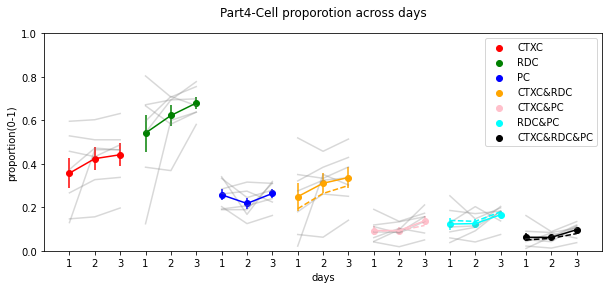

In [52]:
colors = ["red","green","blue","orange","pink","cyan","black"]
plt.figure(figsize=(10,4))
ys=[]
handles = []
for i in range(7):
    cell_types = nums[:,:,i]/nums[:,:,7]
    print(cell_types)
    x = np.array([1,2,3])+3*i
    y = np.mean(cell_types,axis=1)
    ys.append(y)
    sem = np.std(cell_types,axis=1,ddof=1)/np.sqrt(len(cell_types[0]))
    plt.plot(x,cell_types,color="gray",alpha=0.3)
    h = plt.scatter(x,y,color = colors[i])
    handles.append(h)
    plt.errorbar(x,y,yerr=sem,color = colors[i])
    if i == 3:
        plt.plot(x,ys[0]*ys[1],"--",color=colors[i])
    if i == 4:
        plt.plot(x,ys[0]*ys[2],"--",color=colors[i])
    if i == 5:
        plt.plot(x,ys[1]*ys[2],"--",color=colors[i])
    if i == 6:
        plt.plot(x,ys[0]*ys[1]*ys[2],"--",color=colors[i])
plt.legend(handles=handles,labels=["CTXC","RDC","PC","CTXC&RDC","CTXC&PC","RDC&PC","CTXC&RDC&PC"])
plt.xticks(ticks=np.arange(1,22),labels=["1","2","3"]*7)
plt.xlabel("days")
plt.ylabel("proportion(0-1)")
plt.ylim(0,1)
plt.title("Part4-Cell proporotion across days",y=1.05)



### statistic

In [11]:
from mylab.ana.Mstat import *

In [12]:
for i in range(7):
    print("--------------------------")
    cell_types = nums[:,:,i]/nums[:,:,7]
    for a,b in itertools.combinations([0,1,2],2):
        print(a,b,Wilcoxon_signed_ranktest(cell_types[a]-cell_types[b])[1])

--------------------------
0 1 0.296875
0 2 0.03125
1 2 0.07961580146011343
--------------------------
0 1 0.375
0 2 0.15625
1 2 0.078125
--------------------------
0 1 0.3454475304692257
0 2 1.0
1 2 0.21875
--------------------------
0 1 0.296875
0 2 0.03125
1 2 0.15625
--------------------------
0 1 0.9375
0 2 0.046875
1 2 0.03125
--------------------------
0 1 0.8125
0 2 0.15625
1 2 0.109375
--------------------------
0 1 0.8125
0 2 0.109375
1 2 0.046875


C:\Users\qiushou\.conda\envs\mylab\lib\site-packages\scipy\stats\morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\qiushou\.conda\envs\mylab\lib\site-packages\scipy\stats\morestats.py:2971: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
